# Student Exam Performance EDA

The dataset consists of student exam performance records across multiple subjects.

---

### Objectives

* Display my skills in data analysis and visualization using Python
* Explore the data thoroughly to become more familiar with what it represents
* Discover indicators for student exam scores
* Display my skills in writing clear and concise write ups on the stories that data is telling

---

## Part 1: Data Cleaning and Preparation

Before any analysis can be done, the data must be inspected and "gotten familiar with." This will include . . .
* Checking for missing or null values in each column
* Checking the data types of each column
* Changing column names as needed
* Checking for and correcting inconsistencies in the data

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
# read in csv

df = pd.read_csv('StudentsPerformance.csv')

In [3]:
# examine the first 5 rows

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Explanation of Column Titles

No explanation for the columns was given, so these are my inferences . . .

* `gender`: Is the student male or female?
* `race/ethnicity`: The race/ethnicity of the student, expressed by breaking the different races into groups with a corresponding letter.
* `parental level of education`: The highest level of education achieved by the parent of each student.
* `lunch`: Which type of lunch does the student receive at school?
* `test preparation course`: Did the student complete a test prep course before taking the exam?
* `math score`: The student's exam score on the math exam.
* `reading score`: The student's exam score on the reading exam.
* `writing score`: The student's exam score on the writing exam.

Some of the column titles need "cleaning" to make them easier to work with.

In [4]:
# exploring the data types and seeing if any of the values are null

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Null or Missing Values

At the top of the output from `df.info()`, we see that the dataframe contains records on 1,000 students over 8 different variables. The `Non-Null Count` column displays that each of the 1,000 records has a non-null value, so nothing needs to be replaced or filled in.

---

### Data Types 

From the `Dtype` column, all of the data types are acceptable, but I do think it would be helpful to at least make the `parental level of education` column values be of type `category` with a specific order, as this variable would have a explicit order based on how high the parent reached in their educational career.

In [5]:
# cleaning up column names

df = df.rename(columns={'race/ethnicity': 'race',
                       'parental level of education' : 'parent_edu',
                       'test preparation course' : 'test_prep',
                       'math score' : 'math_score',
                       'reading score' : 'reading_score',
                       'writing score' : 'writing_score'})

df.head()

,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Checking Value Names for Inconsistencies

The qualitative variables should be checked for inconsistencies like capitialzation or spelling errors. Those would need to be cleaned before working with the data. Also, seeing the unique values in each column will help provide context for what each represents in context.

In [6]:
# what are the distinct entries in each column?
# particularly interested in the columns containing strings

print('UNIQUE VALUES BY COLUMN\n')
print(df.gender.unique())
print(df.race.unique())
print(df.parent_edu.unique())
print(df.lunch.unique())
print(df.test_prep.unique())

UNIQUE VALUES BY COLUMN

['female' 'male']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['standard' 'free/reduced']
['none' 'completed']


#### Parental Level of Education

* `some high school`: The parent attended and did not complete high school, thus they did not receive a high school degree.
* `high school`: The parent's highest education degree earned was a high school degree.
* `some college`: The parent attended and did not complete college, thus they did not receive a college degree.
* `associate's degree`: The parent's highest education degree was an associate's degree, which is usually a two year undergraduate program from a technical or community college in the United States.
* `bachelor's degree`: The parent's highest education degree was a bachelor's degree, which is usually a four year undergraduate program from a college or university in the United States.
* `master's degree`: The parent's highest education degree was a master's degree, which is usually a two year graduate program from a college or university in the United States.

---

#### Lunch

* `standard`: When purchasing lunch from the school, the student would pay full price and does not receive any discount.
* `free/reduced`: When purchasing lunch from the school, the student would pay a reduced price or a free lunch.

---

#### Test Preparation Course

* `none`: The student did **not** receive or take a test prep course before taking the exam.
* `completed`: The student did receive or take a test prep course before taking the exam.

---
#### Inconsistencies in Values

There are no inconsistencies in the entries for each column (no capitalization, spelling, or other errors). I personally would like to rename the entries in the `race` column to just be the letter corresponding with the group. I would also prefer if the `test_prep` column simply displayed 'yes' or 'no'.

In [7]:
# rename values in race column with just the letter

df = df.replace('group A', 'A')
df = df.replace('group B', 'B')
df = df.replace('group C', 'C')
df = df.replace('group D', 'D')
df = df.replace('group E', 'E')

# rename values in test_prep with yes or no

df = df.replace('none', 'no')
df = df.replace('completed', 'yes')

print(df.race.unique())
print(df.test_prep.unique())
df.head()

['B' 'C' 'A' 'D' 'E']
['no' 'yes']


,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score
0,female,B,bachelor's degree,standard,no,72,72,74
1,female,C,some college,standard,yes,69,90,88
2,female,B,master's degree,standard,no,90,95,93
3,male,A,associate's degree,free/reduced,no,47,57,44
4,male,C,some college,standard,no,76,78,75


In [8]:
# changing the data type of parent_edu to an ordered category

order = ['some high school',
         'high school',
         'some college',
         "associate's degree",
         "bachelor's degree",
         "master's degree"]

df.parent_edu = df.parent_edu.astype('category')
df.parent_edu = df.parent_edu.cat.set_categories(order, ordered=True)

df.parent_edu.unique().sort_values()

['some high school', 'high school', 'some college', 'associate's degree', 'bachelor's degree', 'master's degree']
Categories (6, object): ['some high school' < 'high school' < 'some college' < 'associate's degree' < 'bachelor's degree' < 'master's degree']

In [9]:
# checking the summary stats
# to see if any exam scores are strange

print(df.math_score.describe())
print('')
print(df.reading_score.describe())
print('')
print(df.writing_score.describe())

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64


None of the scores appear to be too extreme, or out of bounds. The max of 100 for all of the scores checks out. At least one student received a 0 on the math test, which may be correct, but could indicate a data entry error.

---

#### Adding Additional Columns

I can forsee it being helpful to differentiate between students whose parents have college degrees and those that do not.

In [10]:
degrees = {
    'some high school' : 'no college degree',
    'high school' : 'no college degree',
    'some college' : 'no college degree',
    'associate\'s degree' : 'college degree',
    'bachelor\'s degree' : 'college degree',
    'master\'s degree' : 'college degree',
}

df['parent_deg'] = df.parent_edu.map(degrees)
df.head()

,gender,race,parent_edu,lunch,test_prep,math_score,reading_score,writing_score,parent_deg
0,female,B,bachelor's degree,standard,no,72,72,74,college degree
1,female,C,some college,standard,yes,69,90,88,no college degree
2,female,B,master's degree,standard,no,90,95,93,college degree
3,male,A,associate's degree,free/reduced,no,47,57,44,college degree
4,male,C,some college,standard,no,76,78,75,no college degree


## Part 2: Data Exploration

Now that the data has been cleaned and inspected, some simple visualizations will be created to discover what stories the data has to tell. With each visualization, I will also be providing explanations to describe what I see the data is telling us.

---

### Categorical Variables

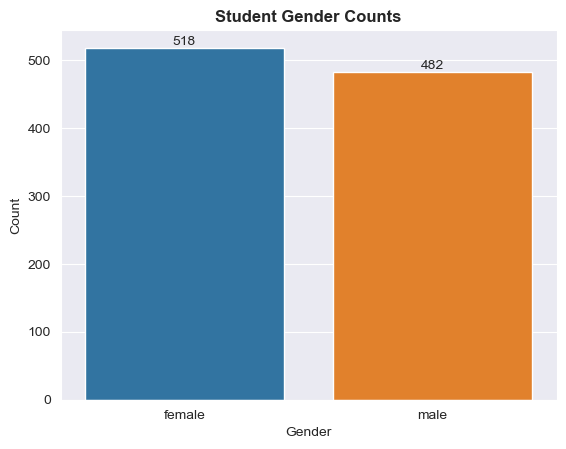

<Figure size 640x480 with 0 Axes>

In [11]:
# create a bar plot to display
# the number of males and females

ax = sns.countplot(x='gender', data=df)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Student Gender Counts', fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

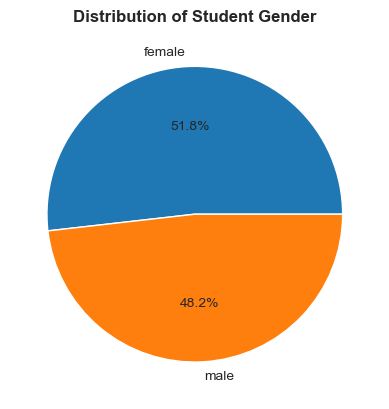

<Figure size 640x480 with 0 Axes>

In [12]:
# create a pie chart to display
# the proportion of students by gender

df.gender.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Student Gender', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

Visually, it's clear that the student data is nearly evenly split between male and female, with females having a slight majority.

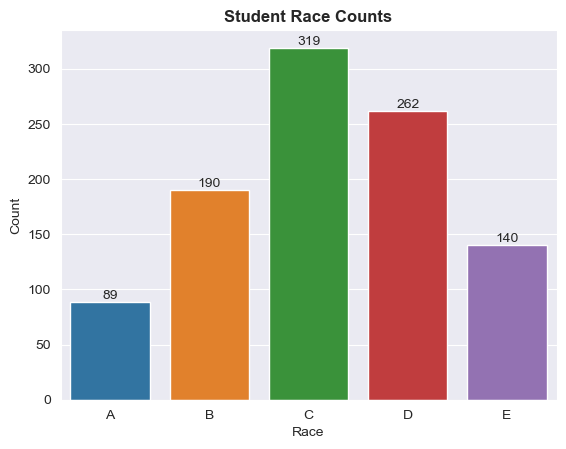

<Figure size 640x480 with 0 Axes>

In [13]:
# create a bar plot to display
# the numbers of races by group

ax = sns.countplot(x='race', data=df, order=['A', 'B', 'C', 'D', 'E'])
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Student Race Counts', fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

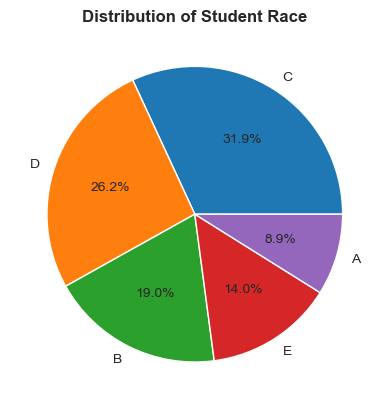

<Figure size 640x480 with 0 Axes>

In [14]:
# create a pie chart to display
# the proportion of students by gender

df.race.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Student Race', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

The student races are not evenly distributed. A is considerably underrepresented among the other four.

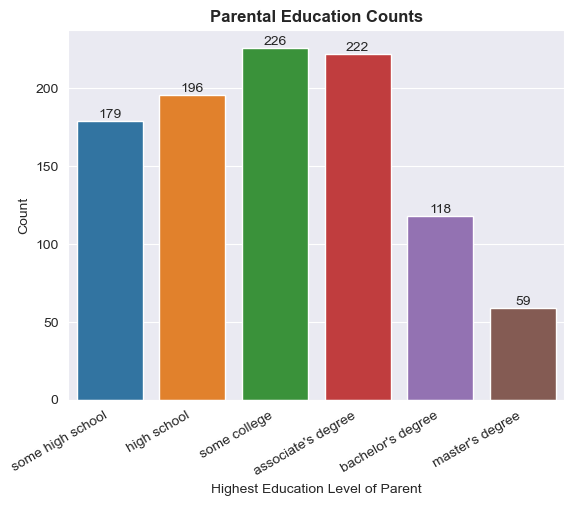

<Figure size 640x480 with 0 Axes>

In [15]:
# create a bar plot to display
# the numbers of parental education

ax = sns.countplot(x='parent_edu', data=df)
plt.xlabel('Highest Education Level of Parent')
plt.ylabel('Count')
plt.title('Parental Education Counts', fontweight='bold')
plt.xticks(rotation=30, ha='right')
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

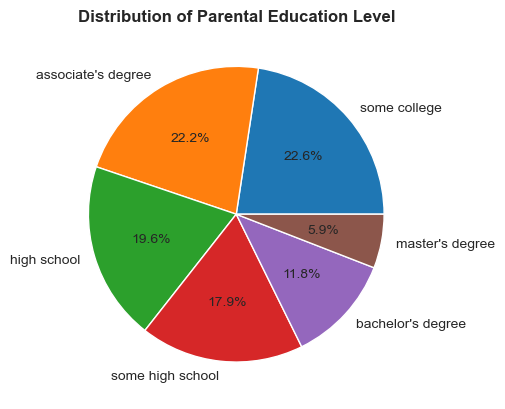

<Figure size 640x480 with 0 Axes>

In [16]:
df.parent_edu.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Parental Education Level', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

The different levels of education are fairly evenly distributed among the first four categories (`some high school`, `high school`, `some college`, and `associate's degree`). The counts/proportions dip fairly significantly for `bachelor's degree` and `master's degree`. We have some sub-categories present here: Having a college degree vs. not having a college degree. 60\% of parents in the sample do not have a college degree (implying 40\% of parents in the sample do have college degrees of some form).

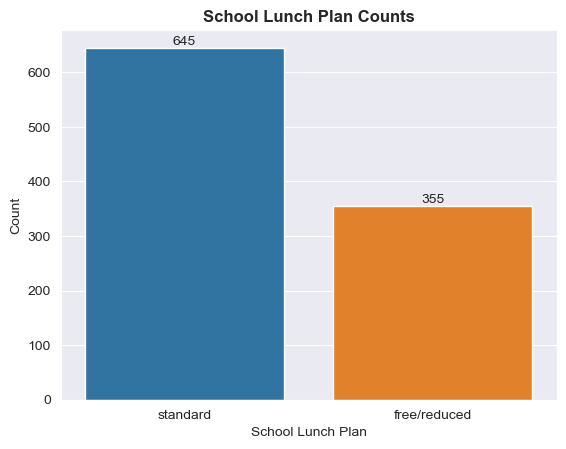

<Figure size 640x480 with 0 Axes>

In [17]:
# create a bar plot to display
# the number of students
# by different lunch plans

ax = sns.countplot(x='lunch', data=df)
plt.xlabel('School Lunch Plan')
plt.ylabel('Count')
plt.title('School Lunch Plan Counts', fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

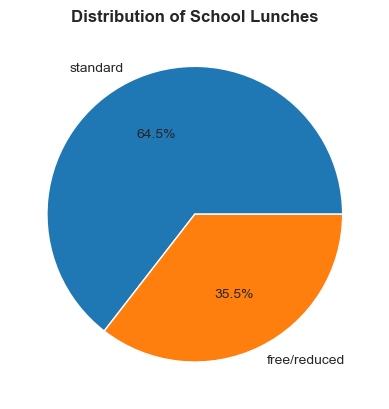

<Figure size 640x480 with 0 Axes>

In [18]:
df.lunch.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of School Lunches', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

The number/proportion of students in the sample who receive no discounted lunch is significantly larger (nearly twice that of `free/reduced`.)

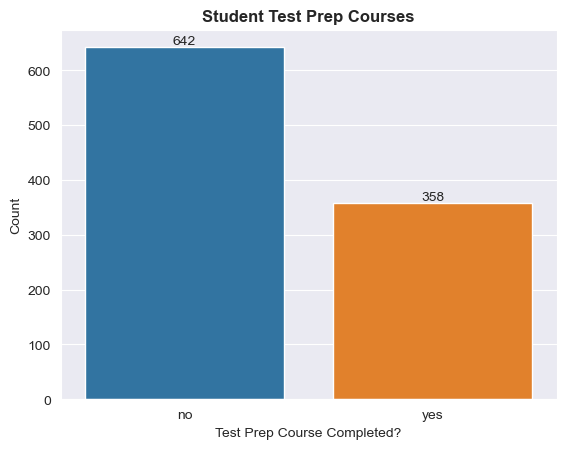

<Figure size 640x480 with 0 Axes>

In [19]:
# create a bar plot to display
# the number of students
# by if they completed a test prep course

ax = sns.countplot(x='test_prep', data=df)
plt.xlabel('Test Prep Course Completed?')
plt.ylabel('Count')
plt.title('Student Test Prep Courses', fontweight='bold')
ax.bar_label(ax.containers[0])
plt.show()
plt.clf()

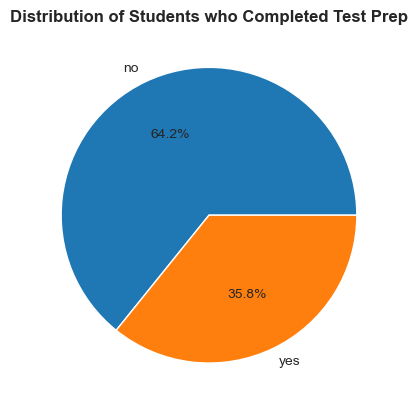

<Figure size 640x480 with 0 Axes>

In [20]:
df.test_prep.value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Distribution of Students who Completed Test Prep', fontweight='bold')
plt.ylabel('')
plt.show()
plt.clf()

The distribution of students who completed a test prep course before taking the exam is nearly identical to the distribution of student lunch plans. Nearly two-thirds of the sample did not complete a test prep course before taking the exam.

---

### Conclusion

The sample is fairly evenly distributed among `gender`, less so among `race` and `parent_edu`, and unevenly distributed among `lunch` and `test_prep`. More exploration will reveal if this lack of representation affects the distribution of scores.

---

### Quantitative Variables

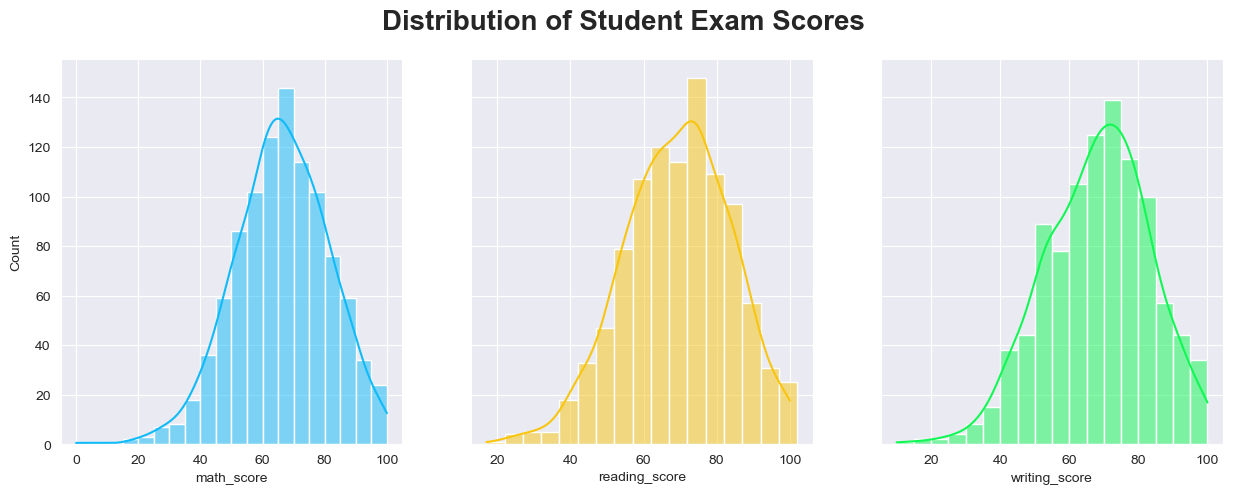

<Figure size 640x480 with 0 Axes>

In [21]:
# create three side by side histograms
# modeling distribution of student exam scores

fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Distribution of Student Exam Scores', size=20, fontweight='bold')

# math
sns.histplot(ax=axes[0], x='math_score', data=df, color='#0FBBF8', kde=True, binwidth=5)

# reading
sns.histplot(ax=axes[1], x='reading_score', data=df, color='#F8C50F', kde=True, binwidth=5)

# writing
sns.histplot(ax=axes[2], x='writing_score', data=df, color='#0FF853', kde=True, binwidth=5)

plt.show()
plt.clf()

From the histograms, the distribution of scores appears to be roughly mound shaped with some skew to the left, as the tails are longer on the left of the plot. The median would be a better representation of the center than the mean in this instance.

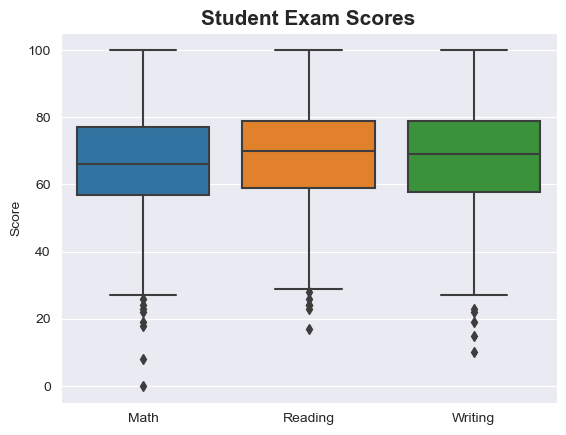

<Figure size 640x480 with 0 Axes>

In [22]:
# create side by side box plots
# to model the distribution of 
# exam scores by subject

exam_scores = df[['math_score', 'reading_score', 'writing_score']]
sns.boxplot(data=exam_scores)
plt.title('Student Exam Scores', size=15, fontweight='bold')
plt.xticks([0, 1, 2], ['Math', 'Reading', 'Writing'])
plt.ylabel('Score')
plt.show()
plt.clf()

The box plots show that the range of scores is approximately the same across the three subjects. Reading does tend to have higher scores than the other two, and math tends to be the lowest. Math in particular has more low outlier scores, with multiple scores below 30. Reading appears to be the most consistent, with smaller interquartile range and range in general.

---

### Bivariate Data

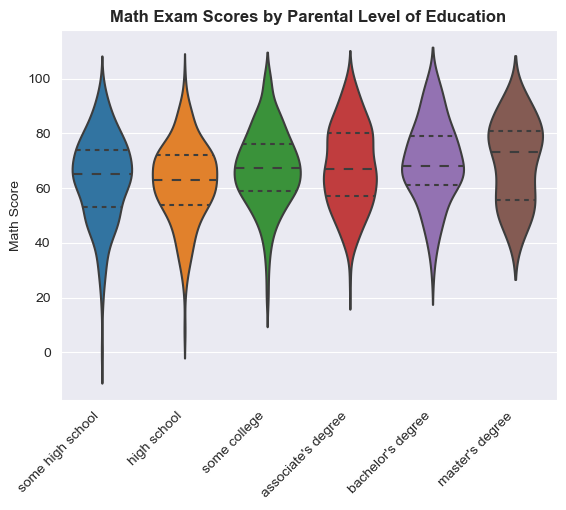

<Figure size 640x480 with 0 Axes>

In [50]:
# writing scores by parent_edu

sns.violinplot(y='math_score', x='parent_edu', data=df, inner='quartile')
plt.title('Math Exam Scores by Parental Level of Education', fontweight='heavy')
plt.ylabel('Math Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

The spread of the math exam scores by `parent_edu` displays some interesting trends. The median does tend to increase slightly as the parent's education level goes up. Interestingly, the interquartile ranges (the distances between the top and bottom dashed lines) seems to widen as the parent's education level increases. There is considerable overlap between all of the plots, so the association between the parent's education level and the student's math score appears weak.

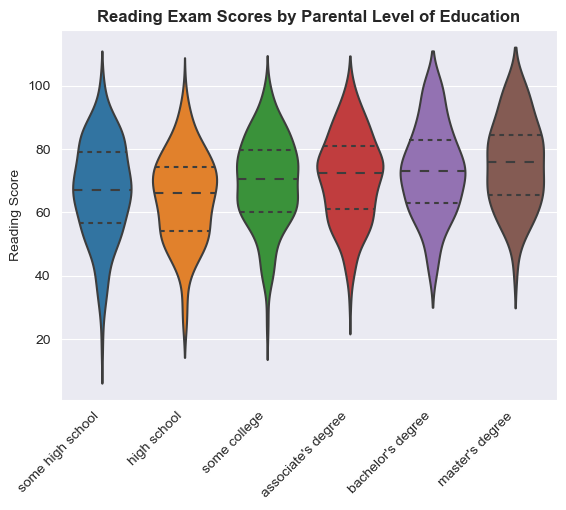

<Figure size 640x480 with 0 Axes>

In [51]:
# writing scores by parent_edu

sns.violinplot(y='reading_score', x='parent_edu', data=df, inner='quartile')
plt.title('Reading Exam Scores by Parental Level of Education', fontweight='heavy')
plt.ylabel('Reading Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

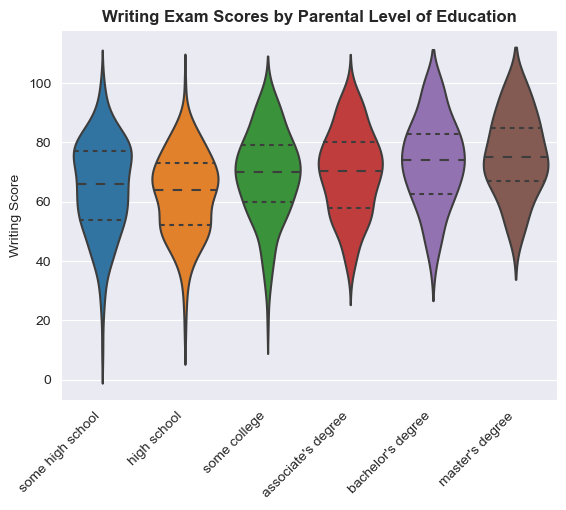

<Figure size 640x480 with 0 Axes>

In [52]:
# writing scores by parent_edu

sns.violinplot(y='writing_score', x='parent_edu', data=df, inner='quartile')
plt.title('Writing Exam Scores by Parental Level of Education', fontweight='heavy')
plt.ylabel('Writing Score')
plt.xlabel('')
plt.xticks(rotation=45, ha='right')
plt.show()
plt.clf()

With reading and writing, there does appear to be a general increase in exam score as the parent's education level increases (moreso than when examining the math scores). There is still considerable overlap, so the association appears weak.

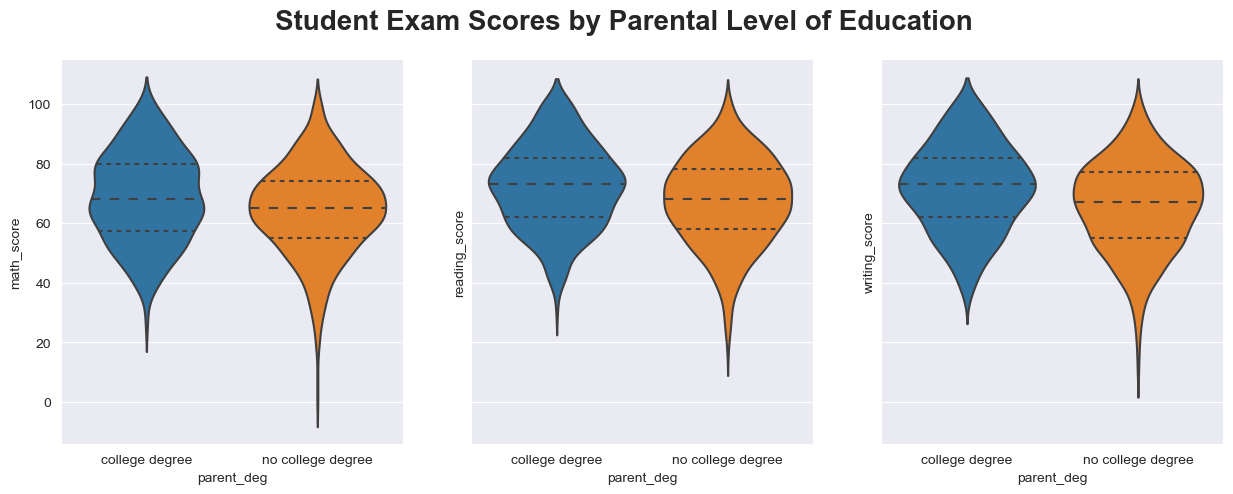

<Figure size 640x480 with 0 Axes>

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Student Exam Scores by Parental Level of Education', size=20, fontweight='bold')

# math
sns.violinplot(ax=axes[0], y='math_score', x='parent_deg', data=df, inner='quartile')

# reading
sns.violinplot(ax=axes[1], y='reading_score', x='parent_deg', data=df, inner='quartile')

# writing
sns.violinplot(ax=axes[2], y='writing_score', x='parent_deg', data=df, inner='quartile')

plt.show()
plt.clf()

By separating into `college degree` and `no college degree` it's clearer that students with parents who have a college degree tend to perform better as a whole. The spread is roughly the same across all groups, except for the math exam where the interquartile range actually increased from `no college degree` to `college degree`.

--- 

### Conclusion

The parent's highest level of education does have some affect a student's exam score, particularly when you separate out into `college degree` vs. `no college degree`. When going by the highest level of education, it's less clear with the math scores, but there is a general trend upward when the parent's education level goes up. More detailed analysis should reveal how strong the association is.

---

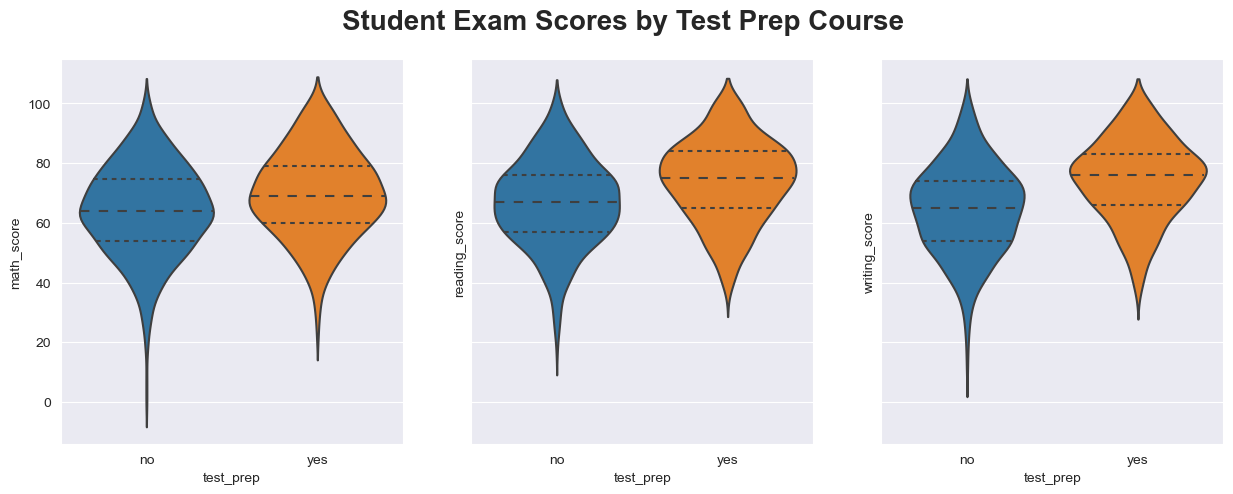

<Figure size 640x480 with 0 Axes>

In [54]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Student Exam Scores by Test Prep Course', size=20, fontweight='bold')

# math
sns.violinplot(ax=axes[0], y='math_score', x='test_prep', data=df, inner='quartile')
plt.ylabel('')

# reading
sns.violinplot(ax=axes[1], y='reading_score', x='test_prep', data=df, inner='quartile')

# writing
sns.violinplot(ax=axes[2], y='writing_score', x='test_prep', data=df, inner='quartile')

plt.show()
plt.clf()

In [28]:
print('Math Scores (Completed Test Prep)')
print(df.math_score[df.test_prep == 'yes'].describe())
print('\nMath Scores (Did Not Complete Test Prep)')
print(df.math_score[df.test_prep == 'no'].describe())

print('\nReading Scores (Completed Test Prep)')
print(df.reading_score[df.test_prep == 'yes'].describe())
print('\nReading Scores (Did Not Complete Test Prep)')
print(df.reading_score[df.test_prep == 'no'].describe())

print('\nWriting Scores (Completed Test Prep)')
print(df.writing_score[df.test_prep == 'yes'].describe())
print('\nWriting Scores (Did Not Complete Test Prep)')
print(df.writing_score[df.test_prep == 'no'].describe())

Math Scores (Completed Test Prep)
count    358.000000
mean      69.695531
std       14.444699
min       23.000000
25%       60.000000
50%       69.000000
75%       79.000000
max      100.000000
Name: math_score, dtype: float64

Math Scores (Did Not Complete Test Prep)
count    642.000000
mean      64.077882
std       15.192376
min        0.000000
25%       54.000000
50%       64.000000
75%       74.750000
max      100.000000
Name: math_score, dtype: float64

Reading Scores (Completed Test Prep)
count    358.000000
mean      73.893855
std       13.638384
min       37.000000
25%       65.000000
50%       75.000000
75%       84.000000
max      100.000000
Name: reading_score, dtype: float64

Reading Scores (Did Not Complete Test Prep)
count    642.000000
mean      66.534268
std       14.463885
min       17.000000
25%       57.000000
50%       67.000000
75%       76.000000
max      100.000000
Name: reading_score, dtype: float64

Writing Scores (Completed Test Prep)
count    358.000000
mean 

### Conclusion

It's fairly clear just from the violin plots that completing a test prep course before the exam helped the student's scores in all subjects. The difference is less dramatic visually on the math exam, but the summary stats make it clear that the students who completed the test prep course faired better on that portion of the exam. It's unclear why the distribution of students who completed the test prep course is so dramatic. The school should look into making the course mandatory for students.

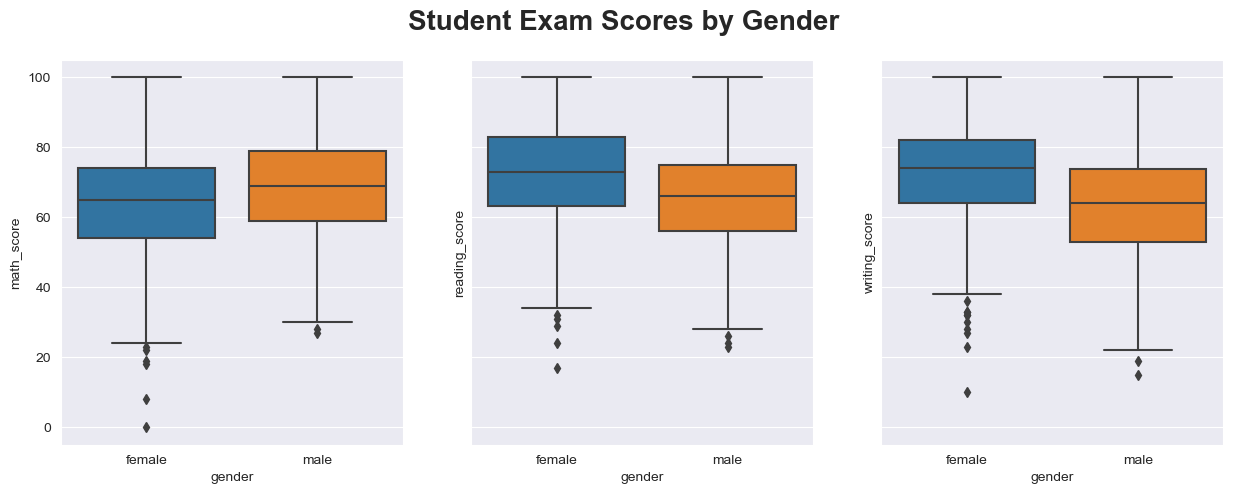

<Figure size 640x480 with 0 Axes>

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Student Exam Scores by Gender', size=20, fontweight='bold')

# math
sns.boxplot(ax=axes[0], y='math_score', x='gender', data=df)
plt.ylabel('')

# reading
sns.boxplot(ax=axes[1], y='reading_score', x='gender', data=df)

# writing
sns.boxplot(ax=axes[2], y='writing_score', x='gender', data=df)

plt.show()
plt.clf()

The female students tended to perform better on the reading and writing exam. The male students performed better on the math exam, but the difference is less dramatic.

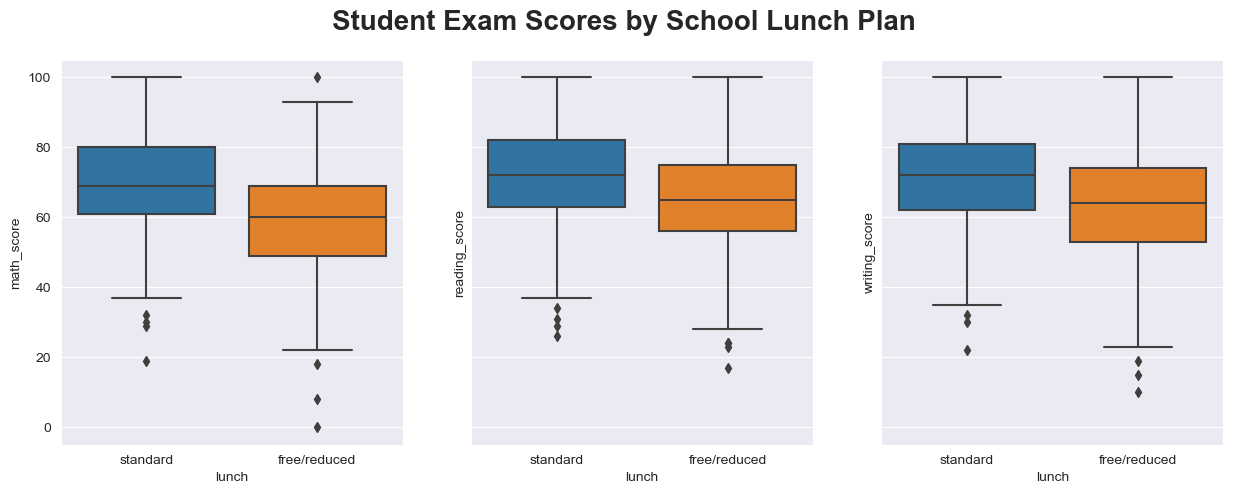

<Figure size 640x480 with 0 Axes>

In [47]:
fig, axes = plt.subplots(1, 3, figsize=(15,5), sharey=True)
fig.suptitle('Student Exam Scores by School Lunch Plan', size=20, fontweight='bold')

# math
sns.boxplot(ax=axes[0], y='math_score', x='lunch', data=df)
plt.ylabel('')

# reading
sns.boxplot(ax=axes[1], y='reading_score', x='lunch', data=df)

# writing
sns.boxplot(ax=axes[2], y='writing_score', x='lunch', data=df)

plt.show()
plt.clf()

# TESTING AREA

This is where spare code is stored or tried out.

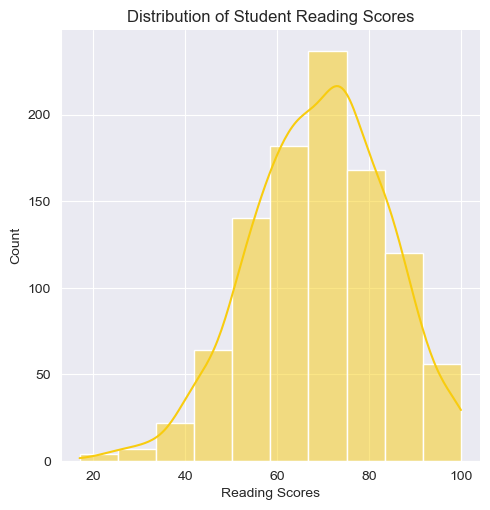

<Figure size 640x480 with 0 Axes>

In [31]:
# histograms of student reading exam scores

sns.displot(df, x='reading_score', kde=True, color='#F8CC0F', bins=10)
plt.title('Distribution of Student Reading Scores')
plt.xlabel('Reading Scores')
plt.show()
plt.clf()

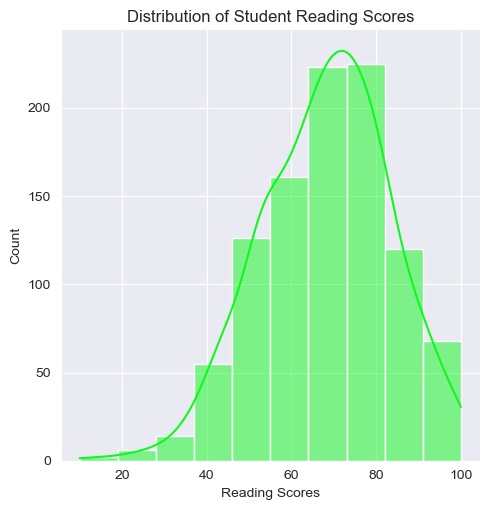

<Figure size 640x480 with 0 Axes>

In [32]:
# histograms of student writing exam scores

sns.displot(df, x='writing_score', kde=True, color='#0FF81F', bins=10)
plt.title('Distribution of Student Reading Scores')
plt.xlabel('Reading Scores')
plt.show()
plt.clf()

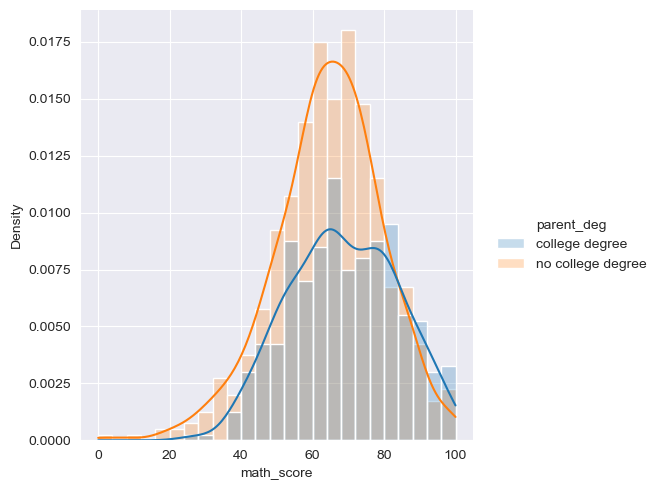

<Figure size 640x480 with 0 Axes>

In [39]:
sns.displot(x='math_score', hue='parent_deg', data=df, kde=True, stat='density', alpha=0.25)
plt.show()
plt.clf()

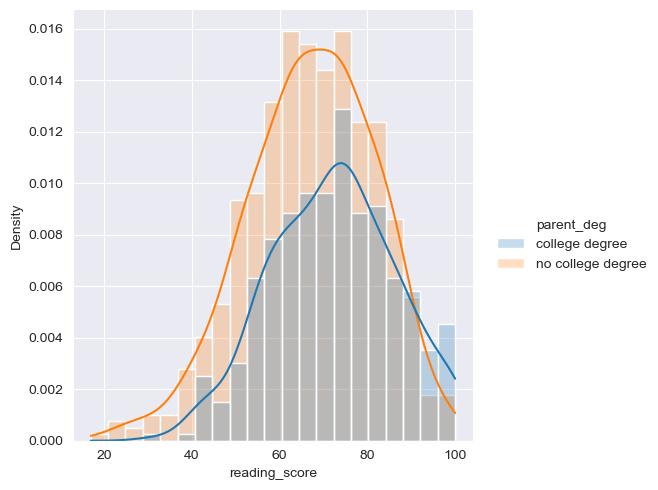

<Figure size 640x480 with 0 Axes>

In [40]:
sns.displot(x='reading_score', hue='parent_deg', data=df, kde=True, stat='density', alpha=0.25)
plt.show()
plt.clf()

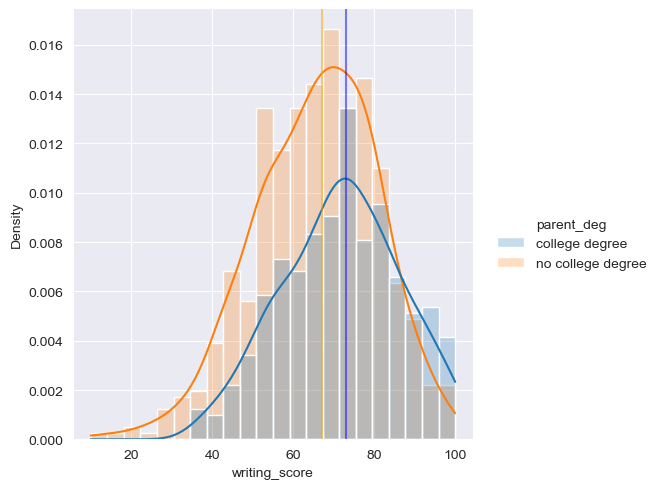

<Figure size 640x480 with 0 Axes>

In [43]:
sns.displot(x='writing_score', hue='parent_deg', data=df, kde=True, stat='density', alpha=0.25)
plt.axvline(x=df.writing_score[df.parent_deg == 'no college degree'].median(), color='orange', alpha=0.5)
plt.axvline(x=df.writing_score[df.parent_deg == 'college degree'].median(), color='blue', alpha=0.5)

plt.show()
plt.clf()

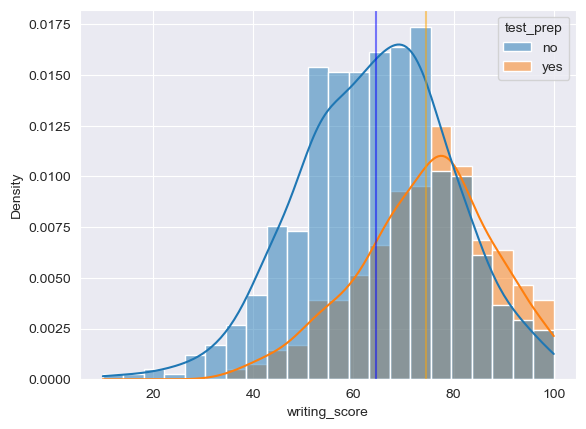

<Figure size 640x480 with 0 Axes>

In [36]:
sns.histplot(x='writing_score', data=df, hue='test_prep', kde=True, stat='density')
plt.axvline(x=df.writing_score[df.test_prep == 'yes'].mean(), color='orange', alpha=0.5)
plt.axvline(x=df.writing_score[df.test_prep == 'no'].mean(), color='blue', alpha=0.5)
plt.show()
plt.clf()